# **Import Libraries**

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

#**1. Data Wrangling**

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Gathering Data

In [49]:
# URL atau path ke workbook
file_path = '/content/drive/MyDrive/PKL/Data Gathering.xlsx'

# Baca semua sheet
all_sheets = pd.read_excel(file_path, sheet_name=None)

# sheet yang ingin digabungkan
sheets_to_combine = ['2023 new', '2024 new', 'poli pd']
selected_sheets = [all_sheets[sheet] for sheet in sheets_to_combine]

# Gabungkan sheet yang dipilih
df = pd.concat(selected_sheets, ignore_index=True)

In [50]:
# Melakukan copy pada data
df1 = df.copy()

df1.head()

,cm,noreg,gender,usia_tahun,usia_bulan,usia_hari,dtgdaftar,diagnosa,TB,BB,IMT,TEST_NM,RESULT_VALUE,FLAG,REF_RANGE
0,0000005418,J1-41-231012-00-019,P,58,11,6,2023-10-12 09:00:00,E10 - Insulin-dependent diabetes mellitus,160.0,75.0,29.30,Glukosa Puasa,191,H,70 - 125
1,0000005418,J1-41-231012-00-019,P,58,11,6,2023-10-12 09:00:00,E10 - Insulin-dependent diabetes mellitus,160.0,75.0,29.30,Glukosa 2 Jam PP,233,H,< 140
2,2021-897727,J1-41-231013-00-011,P,45,4,22,2023-10-13 08:00:00,E11.8 - Non-insulin-dependent diabetes mellitu...,153.0,65.0,27.77,Kolesterol Total,207,H,< 200
3,2021-897727,J1-41-231013-00-011,P,45,4,22,2023-10-13 08:00:00,E11.8 - Non-insulin-dependent diabetes mellitu...,153.0,65.0,27.77,Glukosa Puasa,115,N,70 - 125
4,2021-897727,J1-41-231013-00-011,P,45,4,22,2023-10-13 08:00:00,E11.8 - Non-insulin-dependent diabetes mellitu...,153.0,65.0,27.77,Glukosa 2 Jam PP,212,H,< 140


## Cleaning Data

**df1** = data copy dari df dimana pada data ini dilakukan drop beberapa data

**pivot** = merupakan data df1 yang dilakukan pivot tabel

**df_cleaned** = merupakan data pivot yang telah bebas dari duplikasi dan missing value dan siap digunakan

**data_clean** = data hasil cleaning dan pivot yang disimpan ke excel

In [51]:
# Contoh penghapusan baris dengan kriteria tertentu
df1 = df1.drop(df1[df1['diagnosa'].isin(('E10 - Insulin-dependent diabetes mellitus',
                                         'E10.1 - Insulin-dependent diabetes mellitus with ketoacidosis',
                                         'E10.2 - Insulin-dependent diabetes mellitus with renal com',
                                         'E10.3 - Insulin-dependent diabetes mellitus with ophthalmic complications',
                                         'E10.4 - Insulin-dependent diabetes mellitus with neurological complications',
                                         'E10.5 - Insulin dependent diabetes mellitus with gangrene',
                                         'E10.6 - Insulin-dependent diabetes mellitus with other specified complications',
                                         'E10.8 - Insulin-dependent diabetes mellitus with unspecified complications'
                                         ))].index)

df1.head()

,cm,noreg,gender,usia_tahun,usia_bulan,usia_hari,dtgdaftar,diagnosa,TB,BB,IMT,TEST_NM,RESULT_VALUE,FLAG,REF_RANGE
2,2021-897727,J1-41-231013-00-011,P,45,4,22,2023-10-13 08:00:00,E11.8 - Non-insulin-dependent diabetes mellitu...,153.0,65.0,27.77,Kolesterol Total,207,H,< 200
3,2021-897727,J1-41-231013-00-011,P,45,4,22,2023-10-13 08:00:00,E11.8 - Non-insulin-dependent diabetes mellitu...,153.0,65.0,27.77,Glukosa Puasa,115,N,70 - 125
4,2021-897727,J1-41-231013-00-011,P,45,4,22,2023-10-13 08:00:00,E11.8 - Non-insulin-dependent diabetes mellitu...,153.0,65.0,27.77,Glukosa 2 Jam PP,212,H,< 140
5,2021-897727,J1-41-231013-00-011,P,45,4,22,2023-10-13 08:00:00,E11.8 - Non-insulin-dependent diabetes mellitu...,153.0,65.0,27.77,HbA1C,8.5,H,4.0 - 6.5
6,2019-838120,J1-41-231016-00-005,P,26,1,27,2023-10-16 08:00:00,E10.9 - Diabetes melitus without complication,150.0,49.0,21.78,Glukosa Puasa,131,H,70 - 125


In [52]:
print(len(df1))
df1.info()

3401
<class 'pandas.core.frame.DataFrame'>
Index: 3401 entries, 2 to 5543
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   cm            3401 non-null   object        
 1   noreg         3401 non-null   object        
 2   gender        3401 non-null   object        
 3   usia_tahun    3401 non-null   int64         
 4   usia_bulan    3401 non-null   int64         
 5   usia_hari     3401 non-null   int64         
 6   dtgdaftar     3401 non-null   datetime64[ns]
 7   diagnosa      3401 non-null   object        
 8   TB            3277 non-null   float64       
 9   BB            3277 non-null   float64       
 10  IMT           3277 non-null   float64       
 11  TEST_NM       3401 non-null   object        
 12  RESULT_VALUE  3401 non-null   object        
 13  FLAG          3328 non-null   object        
 14  REF_RANGE     3401 non-null   object        
dtypes: datetime64[ns](1), float64(3), int6

### Pivot Data

In [53]:
# Menambahkan kolom kolesterol total, Gula darah puasa, Gula darah 2 jam setelah makan, HbA1C
# Memindahkan data hasil lab per pasien ke kolom yang baru dibuat
pivot = df1.pivot_table(index = ["cm", "gender", "usia_tahun", "IMT"],
    values = "RESULT_VALUE",
    columns = "TEST_NM",
    aggfunc='first').reset_index()

# Menampilkan hasil akhir
pivot.head()

TEST_NM,cm,gender,usia_tahun,IMT,Glukosa 2 Jam PP,Glukosa Puasa,HbA1C,Kolesterol Total
0,0000000248,L,58,17.93,NaN,92,NaN,164
1,0000000329,L,60,25.71,275,167,NaN,NaN
2,0000000444,P,65,24.84,151,126,5.9,NaN
3,0000000534,L,54,29.07,376,218,NaN,NaN
4,0000000881,P,62,31.22,NaN,NaN,NaN,218


In [54]:
print(len(pivot))

1217


In [55]:
# Informasi data dari setiap kolom
pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cm                1217 non-null   object 
 1   gender            1217 non-null   object 
 2   usia_tahun        1217 non-null   int64  
 3   IMT               1217 non-null   float64
 4   Glukosa 2 Jam PP  1084 non-null   object 
 5   Glukosa Puasa     1149 non-null   object 
 6   HbA1C             528 non-null    object 
 7   Kolesterol Total  290 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 76.2+ KB


In [56]:
# Memeriksa missing value
pivot.isna().sum()

TEST_NM
cm                    0
gender                0
usia_tahun            0
IMT                   0
Glukosa 2 Jam PP    133
Glukosa Puasa        68
HbA1C               689
Kolesterol Total    927
dtype: int64

In [57]:
# Memeriksa data duplicate
pivot.duplicated().sum()
print("Jumlah duplikasi: "), pivot.duplicated().sum()

Jumlah duplikasi: 


(None, 0)

In [58]:
# Menghapus kolom 'Kolesterol Total'
df_cleaned = pivot.drop(columns=['Kolesterol Total', 'cm'])
df_cleaned.head()

TEST_NM,gender,usia_tahun,IMT,Glukosa 2 Jam PP,Glukosa Puasa,HbA1C
0,L,58,17.93,NaN,92,NaN
1,L,60,25.71,275,167,NaN
2,P,65,24.84,151,126,5.9
3,L,54,29.07,376,218,NaN
4,P,62,31.22,NaN,NaN,NaN


In [59]:
# Drop rows with missing values
df_cleaned = df_cleaned.dropna()

In [60]:
# Menghapus baris data yang memiliki data dengan input menyusul pada beberapa kolom
df_cleaned = df_cleaned.drop(
    df_cleaned[
        (df_cleaned['Glukosa 2 Jam PP'] == 'Menyusul') |
        (df_cleaned['Glukosa Puasa'] == 'Menyusul' ) |
        (df_cleaned['HbA1C'] == 'Menyusul' )
        ].index
    )
# Memeriksa missing value
df_cleaned.isna().sum()

TEST_NM
gender              0
usia_tahun          0
IMT                 0
Glukosa 2 Jam PP    0
Glukosa Puasa       0
HbA1C               0
dtype: int64

In [61]:
# Menghapus baris data yang memiliki data dengan input -- pada beberapa kolom
df_cleaned = df_cleaned.drop(
    df_cleaned[
        (df_cleaned['Glukosa 2 Jam PP'] == '--')].index)

# Mengubah .. menjadi ,
df_cleaned['HbA1C'].replace({'6..3': 6.3}, inplace=True)

# Convert columns to numeric
df_cleaned['Glukosa Puasa'] = pd.to_numeric(df_cleaned['Glukosa Puasa'])
df_cleaned['Glukosa 2 Jam PP'] = pd.to_numeric(df_cleaned['Glukosa 2 Jam PP'])
df_cleaned['HbA1C'] = pd.to_numeric(df_cleaned['HbA1C'])


In [62]:
# Mengetahui banyak baris data
print(len(df_cleaned))

436


## Labelling Data

In [63]:
def label_diabetes(row):
    gdp = row['Glukosa Puasa']
    gd2pp = row['Glukosa 2 Jam PP']
    hba1c = row['HbA1C']
    if (hba1c >= 6.5):
        return 'Diabetes'
    else:
        return 'Normal'

# Membuat kolom baru menggunakan apply
df_cleaned['Diagnosa akhir'] = df_cleaned.apply(label_diabetes, axis=1)

## Convert Data to Range

In [64]:
class convert_data:
    def __init__(self, df):
        self.df = df

    def usia(self, row):
        usia = row['usia_tahun']
        if usia < 45:
            return 1
        else:
            return 2

    def imt(self, row):
        bmi = row['IMT']
        if bmi < 18.4:
            return 1
        elif bmi > 25.0:
            return 3
        else:
            return 2

    def gender(self, row):
        jk = row['gender']
        if jk == 'P':
            return 1
        else:
            return 2

    def gdp(self, row):
        glupu = row['Glukosa Puasa']
        if glupu >= 126 :
          return 1
        else:
            return 2

    def gd2pp(self, row):
        glupp = row['Glukosa 2 Jam PP']
        if glupp >= 200 :
          return 1
        else:
            return 2

    def hba1c(self, row):
        a1c = row['HbA1C']
        if a1c >= 6.5 :
          return 1
        else:
            return 2

    def transform_columns(self):
        self.df['usia_tahun'] = self.df.apply(self.usia, axis=1)
        self.df['IMT'] = self.df.apply(self.imt, axis=1)
        self.df['gender'] = self.df.apply(self.gender, axis=1)
        self.df['Glukosa Puasa'] = self.df.apply(self.gdp, axis=1)
        self.df['Glukosa 2 Jam PP'] = self.df.apply(self.gd2pp, axis=1)
        self.df['HbA1C'] = self.df.apply(self.hba1c, axis=1)

    def process(self):
        self.transform_columns()
        return self.df

In [65]:
# Create an instance of the processor and process the data
processor = convert_data(df_cleaned)
df_cleaned = processor.process()

In [66]:
# Simpan Data pivot clean sebagai file Excel baru
data_label = '/content/drive/MyDrive/PKL/PKL_Labeled.xlsx'
df_cleaned.to_excel(data_label)

print(f"Data has been saved as a new file: {data_label}")

Data has been saved as a new file: /content/drive/MyDrive/PKL/PKL_Labeled.xlsx


In [67]:
print(len(df_cleaned))

436


# **2. Analisis Data Eksploratori**

## Mengetahui normalitas data

Dilakukan pada data training saja

In [68]:
# Shapiro-Wilk Test
from scipy.stats import shapiro

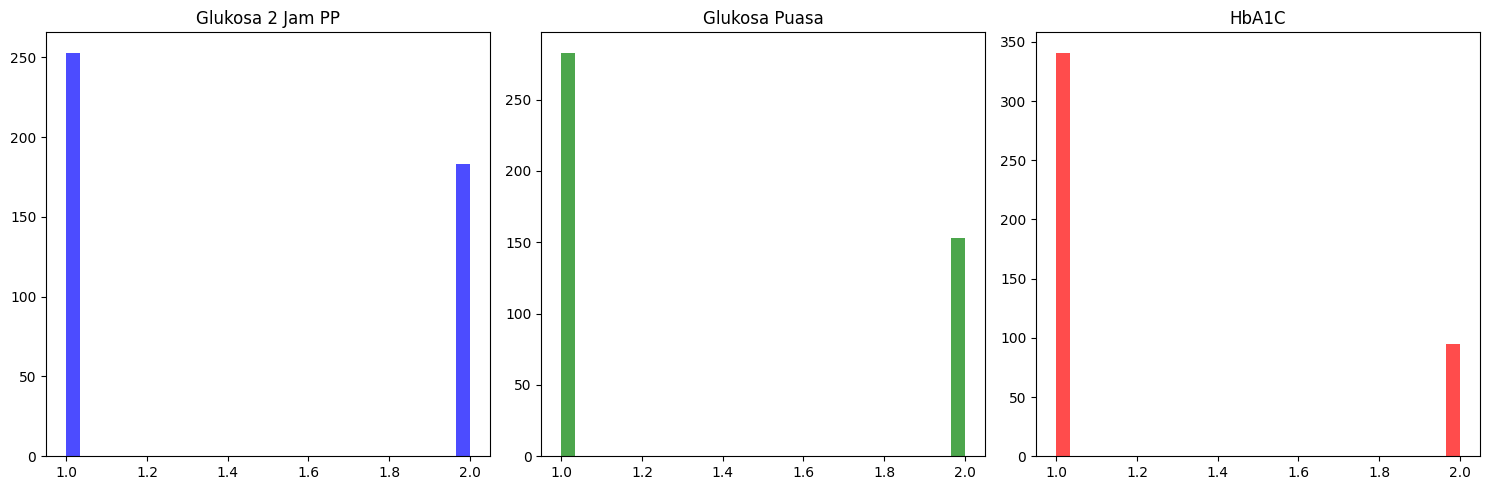

In [69]:
# Mencari tahu distribusi data
data1 = df_cleaned['Glukosa 2 Jam PP']
data2 = df_cleaned['Glukosa Puasa']
data3 = df_cleaned['HbA1C']

# Membuat subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Histogram pertama
axs[0].hist(data1, bins=30, color='blue', alpha=0.7)
axs[0].set_title('Glukosa 2 Jam PP')

# Histogram kedua
axs[1].hist(data2, bins=30, color='green', alpha=0.7)
axs[1].set_title('Glukosa Puasa')

# Histogram ketiga
axs[2].hist(data3, bins=30, color='red', alpha=0.7)
axs[2].set_title('HbA1C')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [70]:
# normality test Glukosa 2 jam PP
stat, p = shapiro(data1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret results
alpha = 0.05
if p > alpha:
    print('Data Glukosa 2 jam PP berdistribusi normal (terima H0)')
else:
    print('Data Glukosa 2 jam PP tidak berdistribusi normal (tolak H0)')

# normality test Glukosa Puasa
stat, p = shapiro(data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret results
alpha = 0.05
if p > alpha:
    print('Data Glukosa Puasa berdistribusi normal (terima H0)')
else:
    print('Data Glukosa Puasa tidak berdistribusi normal (tolak H0)')

# normality test Glukosa Puasa
stat, p = shapiro(data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret results
alpha = 0.05
if p > alpha:
    print('Data HbA1C berdistribusi normal (terima H0)')
else:
    print('Data HbA1C tidak berdistribusi normal (tolak H0)')

Statistics=0.627, p=0.000
Data Glukosa 2 jam PP tidak berdistribusi normal (tolak H0)
Statistics=0.603, p=0.000
Data Glukosa Puasa tidak berdistribusi normal (tolak H0)
Statistics=0.509, p=0.000
Data HbA1C tidak berdistribusi normal (tolak H0)


## Banyak data per jenisnya

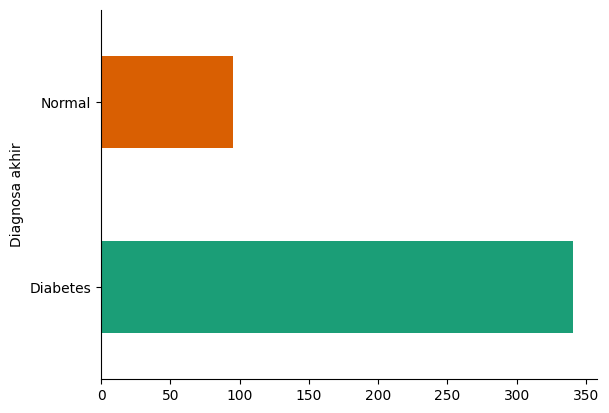

In [71]:
# Mengetahui banyak pelanggan biasa yang menyewa sepeda pada tahun 2011 - 2012
df_cleaned.groupby('Diagnosa akhir').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# **3. Data Preprocessing**

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [73]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [74]:
import pickle

In [75]:
X = df_cleaned.iloc[:, :-1]
y = df_cleaned.iloc[:, -1]

# 3. Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [76]:
X_train.head()

TEST_NM,gender,usia_tahun,IMT,Glukosa 2 Jam PP,Glukosa Puasa,HbA1C
731,1,2,2,1,1,1
1137,1,2,1,2,2,2
91,1,2,3,1,1,1
191,2,2,2,1,1,1
842,2,1,3,1,1,1


In [77]:
y_train.head()

731     Diabetes
1137      Normal
91      Diabetes
191     Diabetes
842     Diabetes
Name: Diagnosa akhir, dtype: object

# **4. Naive Bayes**

In [78]:
# Bangun dan latih model Naive Bayes
model = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi naive bayes
nbtrain = model.fit(X_train, y_train)

In [79]:
Y_predict = nbtrain.predict(X_test)
print("Prediksi Naive Bayes : ",Y_predict)

Prediksi Naive Bayes :  ['Normal' 'Diabetes' 'Diabetes' 'Diabetes' 'Diabetes' 'Diabetes'
 'Diabetes' 'Diabetes' 'Diabetes' 'Diabetes' 'Diabetes' 'Diabetes'
 'Diabetes' 'Normal' 'Diabetes' 'Diabetes' 'Diabetes' 'Diabetes'
 'Diabetes' 'Diabetes' 'Diabetes' 'Diabetes' 'Diabetes' 'Diabetes'
 'Diabetes' 'Diabetes' 'Diabetes' 'Diabetes' 'Diabetes' 'Diabetes'
 'Diabetes' 'Diabetes' 'Normal' 'Diabetes' 'Diabetes' 'Diabetes'
 'Diabetes' 'Diabetes' 'Diabetes' 'Diabetes' 'Diabetes' 'Diabetes'
 'Diabetes' 'Diabetes' 'Diabetes' 'Diabetes' 'Diabetes' 'Diabetes'
 'Diabetes' 'Diabetes' 'Normal' 'Normal' 'Diabetes' 'Diabetes' 'Normal'
 'Diabetes' 'Diabetes' 'Diabetes' 'Diabetes' 'Normal' 'Diabetes'
 'Diabetes' 'Diabetes' 'Normal' 'Diabetes' 'Diabetes' 'Diabetes'
 'Diabetes' 'Normal' 'Normal' 'Normal' 'Diabetes' 'Normal' 'Diabetes'
 'Diabetes' 'Normal' 'Normal' 'Diabetes' 'Normal' 'Diabetes' 'Normal'
 'Diabetes' 'Diabetes' 'Diabetes' 'Diabetes' 'Normal' 'Diabetes'
 'Diabetes']


## Save Model ke PKL

In [80]:
# Simpan model ke dalam file 'naive_bayes_model.pkl'
with open('naive_bayes_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [81]:
# Open model
with open('naive_bayes_model.pkl', 'rb') as file:
  nb = pickle.load(file)

# **5. Evaluasi Model**

In [82]:
# Mengetahui akurasi model
accuracy= accuracy_score(y_test, Y_predict)
print("Akurasi Naive Bayes : ",accuracy)

Akurasi Naive Bayes :  1.0


## Confusion Matrix

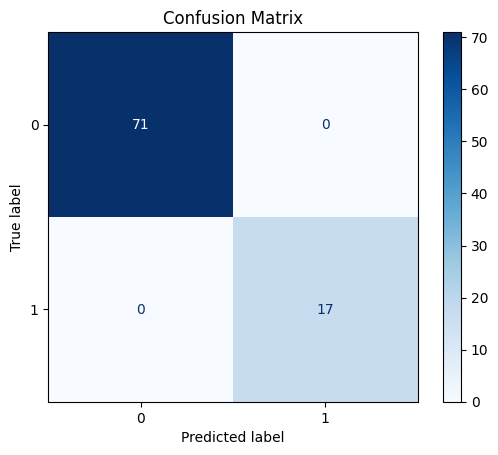

In [83]:
cm = confusion_matrix(y_test, Y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [84]:
# Menghitung nilai akurasi dari klasifikasi naive bayes
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

    Diabetes       1.00      1.00      1.00        71
      Normal       1.00      1.00      1.00        17

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88



## Mengecek Overfit

In [85]:
def plot_learning_curve(
    estimator, title, X, y, axes=None, ylim=None, cv=None,
    n_jobs=None, scoring=None, train_sizes=np.linspace(0.1, 1.0, 5)
):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator, X, y, scoring=scoring, cv=cv,
        n_jobs=n_jobs, train_sizes=train_sizes, return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes, train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std, alpha=0.1, color="r",
    )
    axes[0].fill_between(
        train_sizes, test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std, alpha=0.1, color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes, fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std, alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted, test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted, alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

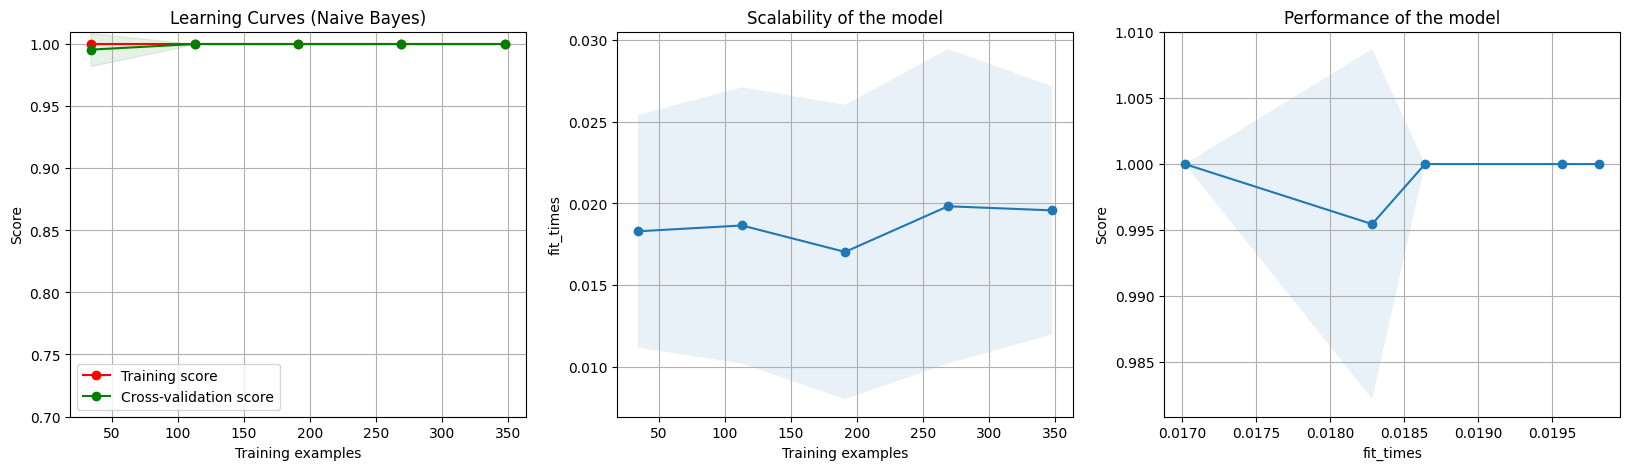

In [86]:
X = df_cleaned.iloc[:, :-1]
y = df_cleaned.iloc[:, -1]

title = "Learning Curves (Naive Bayes)"
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
estimator = GaussianNB()

plot_learning_curve(
    estimator,
    title,
    X,
    y,
    ylim=(0.7, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="accuracy",
)

plt.show()

# **Coba-coba**

In [87]:
class convert_data:
    def __init__(self, df):
        self.df = df

    def usia(self, row):
        usia = row['usia_tahun']
        if usia < 45:
            return 1
        else:
            return 2

    def imt(self, row):
        bmi = row['IMT']
        if bmi < 18.4:
            return 1
        elif bmi > 25.0:
            return 3
        else:
            return 2

    def gender(self, row):
        jk = row['gender']
        if jk == 'P':
            return 1
        else:
            return 2

    def gdp(self, row):
        glupu = row['Glukosa Puasa']
        if glupu >= 126 :
          return 1
        else:
            return 2

    def gd2pp(self, row):
        glupp = row['Glukosa 2 Jam PP']
        if glupp >= 200 :
          return 1
        else:
            return 2

    def hba1c(self, row):
        a1c = row['HbA1C']
        if a1c >= 6.5 :
          return 1
        else:
            return 2

    def transform_columns(self):
        self.df['usia_tahun'] = self.df.apply(self.usia, axis=1)
        self.df['IMT'] = self.df.apply(self.imt, axis=1)
        self.df['gender'] = self.df.apply(self.gender, axis=1)
        self.df['Glukosa Puasa'] = self.df.apply(self.gdp, axis=1)
        self.df['Glukosa 2 Jam PP'] = self.df.apply(self.gd2pp, axis=1)
        self.df['HbA1C'] = self.df.apply(self.hba1c, axis=1)

    def process(self):
        self.transform_columns()
        return self.df

# Contoh data pelatihan
coba_data = {
    'gender': ['L', 'P', 'L', 'P', 'L', 'P', 'L', 'P', 'L', 'P'],
    'usia_tahun': [55, 34, 48, 29, 61, 52, 44, 38, 66, 47],
    'IMT': [27.5, 29.0, 29.8, 24.5, 31.2, 28.3, 26.1, 23.4, 32.0, 30.5],
    'Glukosa 2 Jam PP': [180, 150, 210, 135, 250, 200, 145, 160, 220, 180],
    'Glukosa Puasa': [110, 90, 130, 85, 140, 120, 95, 105, 150, 115],
    'HbA1C': [6.9, 7.8, 7.1, 5.6, 7.5, 6.8, 5.9, 6.0, 7.8, 6.2]
}

# Membuat DataFrame dari data pelatihan
df_coba = pd.DataFrame(coba_data)
conv = convert_data(df_coba)
df_coba = conv.process()
pred = nbtrain.predict(df_coba)

print(pred)

['Diabetes' 'Diabetes' 'Diabetes' 'Normal' 'Diabetes' 'Diabetes' 'Normal'
 'Normal' 'Diabetes' 'Normal']


In [89]:
y_pred = nb.predict(df_coba)
print(y_pred)

['Diabetes' 'Diabetes' 'Diabetes' 'Normal' 'Diabetes' 'Diabetes' 'Normal'
 'Normal' 'Diabetes' 'Normal']
